# Проект. Приоритизация гипотез. Анализ A/B-теста.

## Описание проекта

**Контекст**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Часть 1. Приоритизация гипотез.**

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**
* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста.**

Вы провели A/B-тест и получили результаты, которые описаны в файлах.

**Задача**

Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## Описание данных

**Данные для первой части**

Файл /datasets/hypothesis.csv.
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

Файл /datasets/orders.csv.
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез

In [1]:
# подключаю библиотеки
import pandas as pd
import numpy as np 
import datetime as dt
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загружаю датасет с гипотезами
try:
    hypotheses = pd.read_csv('hypothesis.csv')
except FileNotFoundError as e:
    print(e)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 0)
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


**Фреймворк ICE для приоритизации гипотез.**

In [4]:
hypotheses['ICE'] = round((hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Efforts'], 2)

In [5]:
# Сортирую по убыванию  приоритизации гипотезы
hypotheses.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


**Фреймворк RICE для приоритизации гипотез.**

In [6]:
hypotheses['RICE'] = ((hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']
                      ) / hypotheses['Efforts'])

In [7]:
# Сортирую по убыванию приоритизации гипотезы
hypotheses.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


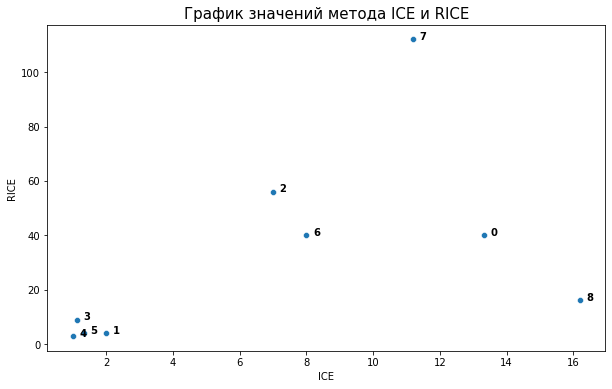

In [8]:
plt.figure(figsize=(10,6))
plt.title('График значений метода ICE и RICE', size=15)
sns.scatterplot(x=hypotheses['ICE'], y=hypotheses['RICE'])
for line in range(0,hypotheses.shape[0]):
     plt.text(hypotheses.ICE[line]+0.2, 
              hypotheses.RICE[line], 
              hypotheses.index[line], 
              horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

Методы приоритизации гипотез ICE и RICE отличаются только одним параметром Reach (скольких пользователей затронет изменения). Чем больше Reach, тем больше RICE.

По ICE самое первое место занимает гипотиза №8, а по RICE гипотиза №8 стоит на 5 месте. Потому что у этой гипотизы Reach=1(т.е. изменения затрагивают небольшое количество пользователей), из-за этого по RICE гипотиза №8 не продвинулась выше.

## Анализ A/B-теста

In [9]:
# датасет с заказами пользователей
try:
    orders = pd.read_csv('orders.csv')
except FileNotFoundError as e:
    print(e)

In [10]:
# датасет с визитами пользователей
try:
    visitors = pd.read_csv('visitors.csv')
except FileNotFoundError as e:
    print(e)

In [11]:
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


In [12]:
visitors.head(3)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


Привожу дату типу к datetime

In [13]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Пропусков нет.

Данные соответствуют типам.

**Проверю, что бы в группах А и В не было одинаковых пользователей.**

In [16]:
recurring_users = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), 
                                 orders.query('group == "B"')['visitorId'].unique())
len(recurring_users)

58

Эти пользователи находятся в группе А и В. Я их удалю.

In [17]:
orders = orders.query('visitorId not in @recurring_users')
len(orders)

1016

Создаю массив уникальных пар значений дат и групп теста:

In [18]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [19]:
datesGroups.head(3)

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A


Собераю агрегированные кумулятивные по дням данные о заказах.

Строки таблицы orders, даты котрых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups.

Вычисляю максимальную дату, группу, число уникальных заказов и пользователей.

In [20]:
ordersAggregated = (datesGroups.apply
                    (lambda x: orders[
                        np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                     .agg({'date': 'max', 'group': 'max', 'visitorId': 'nunique', 
                           'transactionId': 'nunique', 'revenue': 'sum'}), axis=1)
                    .sort_values(by=['date', 'group']))

In [21]:
ordersAggregated.head()

,date,group,visitorId,transactionId,revenue
55,2019-08-01,A,19,23,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,36,42,234381
173,2019-08-02,B,39,40,221801
291,2019-08-03,A,60,66,346854


Аналогично получу агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [22]:
visitorsAggregated = (datesGroups.apply(lambda x: visitors[
    np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                        .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'})
                                        , axis=1)
                      .sort_values(by=['date', 'group']))

In [23]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединяю две таблицы:

In [24]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], 
                                        right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'buyers', 'orders', 'revenue', 'visitors']
# date - дата
# group - группа A/B-теста (A или B)
# buyers - кумулятивное количество пользователей, совершивших хотя бы один заказ, 
#          на указанную дату в указанной группе
# orders - кумулятивное количество заказов на указанную дату в указанной группе
# revenue - кумулятивная выручка на указанную дату в указанной группе (средний чек)
# visitors - кумулятивное количество посетителей интернет-магазина на указанную дату 
#            в определённой группе

cumulativeData.head()

,date,group,buyers,orders,revenue,visitors
0,2019-08-01,A,19,23,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,36,42,234381,1338
3,2019-08-02,B,39,40,221801,1294
4,2019-08-03,A,60,66,346854,1845


### График кумулятивной выручки по группамм.

Строю графики кумулятивной выручки по дням и группам A/B-тестирования:

In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

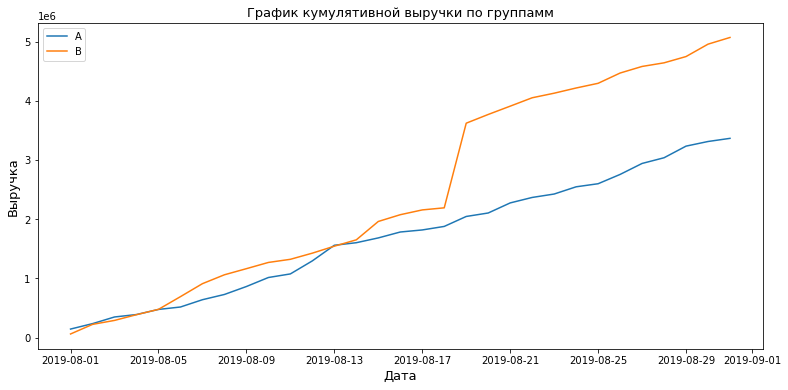

In [26]:
plt.figure(figsize = (13,6))
# график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группамм', size=13)
plt.xlabel('Дата', size=13)
plt.ylabel('Выручка', size=13)
plt.legend()
pd.set_option('chained_assignment', None)

Выручка в обеих группах увеличивается в течении всего теста.

График группы B имеет резкий рост, это может сигнализировать о всплесках заказов, либо о появлении очень дорогих заказов в выборке.

График группы А почти прямой.

### График кумулятивного среднего чека по группам

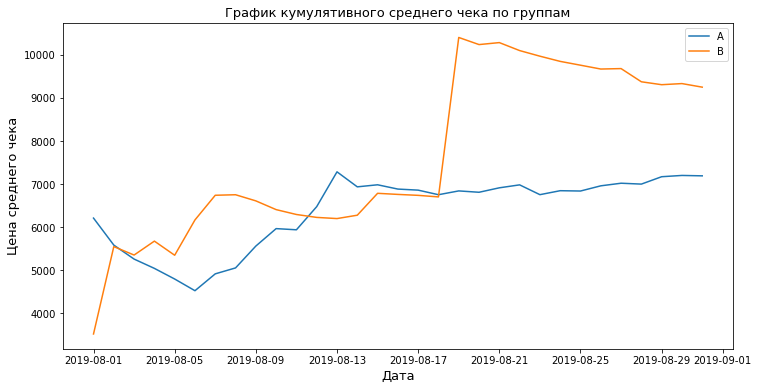

In [27]:
plt.figure(figsize = (12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], 
         label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], 
         label='B')
plt.title('График кумулятивного среднего чека по группам', size=13)
plt.xlabel('Дата', size=13)
plt.ylabel('Цена среднего чека', size=13)
plt.legend()

Средний чек становиться более равномерным к концу теста.

Средний чек в группах имеет резкий рост. Возмжно, в группы попали крупные заказы.

В группе В к концу теста средний чек снижается.

### График относительного изменения кумулятивного среднего чека группы B к группе A.

In [28]:
# собираю данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


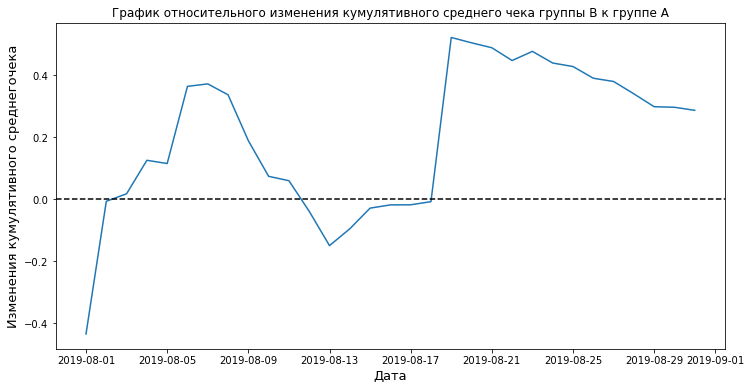

In [29]:
plt.figure(figsize = (12,6))
# строю отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']) / (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']) - 1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата', size=13)
plt.ylabel('Изменения кумулятивного среднегочека', size=13)
# добавляю ось X
plt.axhline(y=0, color='black', linestyle='--')


В некоторых точках график различия между сегментами резко скачет, где-то спрятались крупные заказы, выбросы.

### График кумулятивной конверсии по группам.

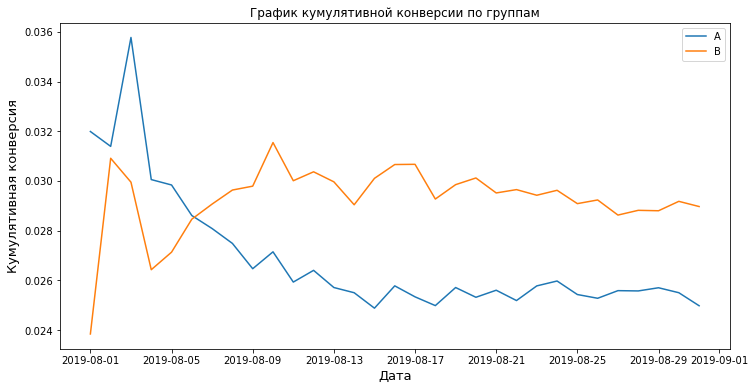

In [30]:
# считаю кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
# отделяю данные по группе А
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
# отделяю данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# строю график
plt.figure(figsize = (12,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата', size=13)
plt.ylabel('Кумулятивная конверсия', size=13)
plt.legend()

Сначала конверсия группы А была выше, но потом просела и держиться ниже уровня конверсии группы В.

Конверсия на протяжении всего теста скачет, в начале теста самые большие скачки. Под конец они затихают.

Конверсия группы А на протяжении всего теста снижается.

Конверсия группы В под конец теста становиться более равномерной.

Конверсия у группы В лучше.

### График относительного изменения кумулятивной конверсии группы B к группе A.

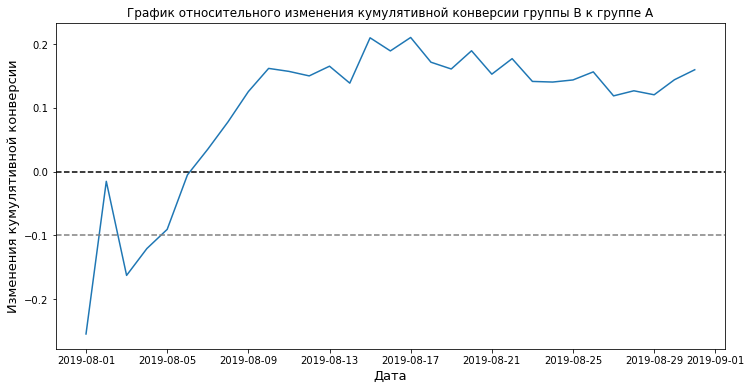

In [31]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], 
                                                                            left_on='date', right_on='date', how='left', 
                                                                            suffixes=['A', 'B'])

plt.figure(figsize = (12,6))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1, 
        label='Относительный прирост конверсии группы B относительно группы A')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата', size=13)
plt.ylabel('Изменения кумулятивной конверсии', size=13)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

В начале теста группа В проигрывала группе А по конверсии. Потом конверсия группы В выраста и стала больше группы А. И это положение держало до конца теста.

### Точечный график количества заказов по пользователям

In [32]:
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B


Датасет orders группирую по пользователем и считаю количество заказов для каждого пользователя.

In [33]:
orders_by_users = orders.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_by_users.columns = ['visitorId', 'orders']

In [34]:
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Максимальное число количество заказов - 3.

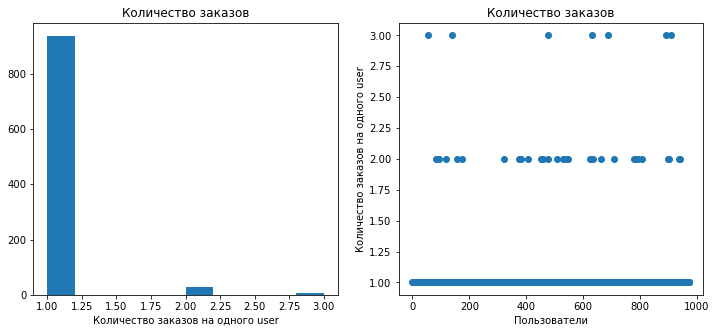

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.hist(orders_by_users['orders'])
plt.title('Количество заказов')
plt.xlabel('Количество заказов на одного user')

plt.subplot(1, 2, 2)
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Количество заказов')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов на одного user')

plt.show()

Большинство пользователей сделали 1 заказ. 

Количетво заказов 2 и 3 похожи на выбросы.

### 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей.

In [36]:
np.percentile(orders_by_users['orders'], [90, 95, 99])

array([1., 1., 2.])

Не более 1% пользователей совершили 2-3 заказа. 99% пользователей совершили по 1 заказу.

Граница для анамальных пользователей - 1 заказ, все что выше этого значения - выбросы. Значит отсею все значения, которые больше одного заказа.

### Точечный график стоимостей заказов.

Text(0.5, 0, 'Пользователи')

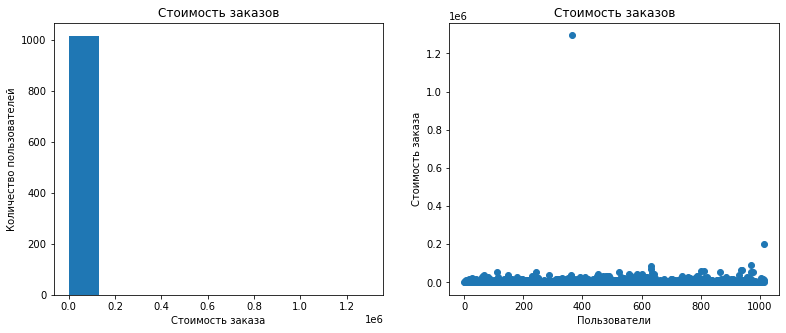

In [37]:
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)
plt.hist(orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Стоимость заказа')
plt.ylabel('Количество пользователей')

plt.subplot(1, 2, 2)
x_values = pd.Series(range(0, len(orders)))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')

На графике есть очень большие выбросы, установлю лимит по оси, что бы избавиться от выбраса.

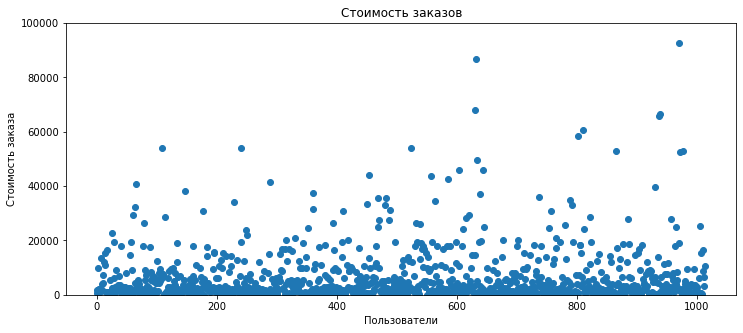

In [38]:
plt.figure(figsize=(12,5))
x_values = pd.Series(range(0, len(orders)))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')
plt.ylim(0, 100000)

plt.show()

Есть заказы, котрые сильно отличаются от большинства заказов и это явно выбросы.

### 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

In [39]:
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

У 5% пользователей заказ больше 26785, у 1% пользователей заказ равен и больше 53904.

Граница аномальных заказов - заказы больше 50000.

###  Cтатистическая значимость различий в конверсии между группами по «сырым» данным.

Подготовка данных.

In [40]:
visitors.head(3)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [41]:
# Дата и количество визитов в эту дату в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head(3)

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507


In [42]:
# таблица с накопленными данными по дням
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [43]:
# те же операции проделываю с группой В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [44]:
# количество заказов и их стоимость по датам в группе А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head(2)

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,23,142779
1,2019-08-02,19,91602


In [45]:
# кумулятивные данные в группе А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


In [46]:
# те же операции проделываю с группой В в датафрейме orders
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648


Объединяю таблицы:
- ordersADaily
- ordersBDaily
- ordersACummulative
- ordersBCummulative
- visitorsADaily
- visitorsBDaily
- visitorsACummulative
- visitorsBCummulative

In [47]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Названия столбцов данных:
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Посчитаю статистическую значимость различия в конверсии между группами.

Создадим переменные *ordersByUsersA* и *ordersByUsersB*. В них для пользователей, укажу число совершённых заказов.

In [48]:
ordersByUsersA = (orders[orders['group'] == 'A']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersA.head(3)

,visitorId,orders
0,11685486,1
1,54447517,1
2,66685450,1


In [49]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 
ordersByUsersB.head(3)

,visitorId,orders
0,5114589,1
1,6958315,1
2,39475350,1


Создаю переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули

In [50]:
sampleA = pd.concat(
    [ordersByUsersA['orders'], 
     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'], 
     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

sampleA.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

**Формулировки гипотез:**

Нулевая гипотиза: Статистически значимых различий в конверсии между группами А и В нет.

Альтернативная гипозиза: Есть статистически значимые различия в конверсии между группами А и В.


Нулевая гипотиза: Статистически значимых различий в среднем чеке заказа между группами А и В нет.

Альтернативная гипозиза: Есть статистически значимые различия в среднем чеке заказа между группами А и В.

In [51]:
print("{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.5f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01102
0.15980


Вывод: По «сырым» данным есть различие в конверсии групп A и B.

Первое число — p-value = 0.00551 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. 

Относительный выигрыш группы B равен 15.9% — второе число в выводе.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Передадаю критерию mannwhitneyu() данные о выручке с заказов.

In [52]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                       orders[orders['group']=='B']['revenue'])[1]))
           
print("{0:.5f}".format(
    orders[orders['group']=='B']['revenue'].mean() / 
    orders[orders['group']=='A']['revenue'].mean() - 1))

0.829
0.28660


Провожу двусторонний тест:

In [53]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                       orders[orders['group']=='B']['revenue'], 
                                       alternative = 'two-sided')[1]))
           
print("{0:.5f}".format(
    orders[orders['group']=='B']['revenue'].mean() / 
    orders[orders['group']=='A']['revenue'].mean() - 1))

0.829
0.28660


In [54]:
#Reviewer's code
import scipy
scipy.__version__

'1.7.1'

p-value = 0.829, это больше 0.05. Значит, нулевая гипотиза, что средние чеги в группах А и В равны, верна.

Впрочем, средний чек группы B значительно выше среднего чека группы A.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным.

Приму за анамальных пользователей тех, кто сделал больше 1 заказа и совершивших заказы дороже 50000.

In [55]:
# пользователи, совершившие больше 1го заказа
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] >= np.percentile(orders_by_users['orders'], 99)
                   ]['visitorId'], 
    ordersByUsersB[ordersByUsersB['orders'] >= np.percentile(orders_by_users['orders'], 99)
                  ]['visitorId']], 
    axis=0)

# пользователи, у которых заказ превышает стоимость 53904
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)
                                 ]['visitorId']

# объединяю данные, что бы анамальные пользователи были в одной таблице
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
                 .drop_duplicates()
                 .sort_values())
print(abnormalUsers.shape)
abnormalUsers.head()

(45,)


1099    148427295
33      249864742
36      366673373
51      406208401
67      522292794
Name: visitorId, dtype: int64

Получилось 50 аномальных пользователей.

Посмотрю, как будет выглядеть статическая значимость без этих пользователей.

In [56]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применяю статистический критерий Манна-Уитни к полученным выборкам:

In [57]:
print('{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.5f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.00820
0.18757


Результаты немного изменились, но не сильно p-value стало 0.004, а было 0.005, это все меньше 0.05.

Значит, нулевая гипотиза о равенстве конверсии между группами А и В неверна.

Конверсии в группах различны.

Относительная разница группы В была 15.9%, стала 19%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [58]:
print(
    '{0:.5f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.5f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.96949
0.00239


После очистки данных статистическая значимость различий в среднем чеке заказа между группами А и В, немного изменилась.

P-value стала 0.48, было 0.41, эти значения больше 0.05. Значит, нет различий в среднем чеке заказа между группами А и В.

Так же очищенные данные показали, что средний чек группы В выше всего на 2.7%, по сырым данным это значение было равно 28.6%.

### Решение по результатам теста.

Остановить тест, зафиксировать победу группы В.

Пользователи из группы В чаще совершают покупки, значит конверсия в этой группе выше. 

Статической значимости различий в среднем чеке между группами А и В нет. Но в группе В средний чек немного выше чем в группе А, на 2.7%

Группа В приводит больше клиентов, значит выручка будет выше.